# Do Rooms that Mention the Word 'View' in their Description Charge More?

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

FilePathRoot = "C:\\Users\\USBennetDa2\\OneDrive - NESTLE\\Udacity Data Science Nanodegree\\Project 1"

### Bring in the Cleaned Files

In [2]:
# Listing Data for Number of Bedrooms and Description
ListingsCleaned = pd.read_csv(FilePathRoot + "\\ListingsCleaned.csv")

#Calendar Data for the Price
CalendarCleaned = pd.read_csv(FilePathRoot + "\\CalendarCleaned.csv")
CalendarCleaned["id"] = CalendarCleaned["listing_id"]

### Analysis of Data

In [3]:
# What is the average price per night for each rental?
ListingPrice = CalendarCleaned.groupby("id").mean().drop(["listing_id", "available"], axis = 1)
#print(ListingPrice.shape)
ListingPrice.dropna(subset = ["price"], inplace = True) #There are 95 out of 3818 listings without a price. This is a small enough number that I am comfortable dropping them.
#print(ListingPrice.shape)

# Simplify the dataframe to only include the relevant columns
ListingView = ListingsCleaned[["id", "description", "bedrooms"]] 
#print(ListingView.shape)
ListingView.dropna(subset = ["bedrooms"], inplace = True) #There are 5 out of 3818 listings without number of bedrooms. This is a small enough number that I am comfortable dropping them.
#print(ListingView.shape)

# Join the dataframes together on the IDs.
joined = pd.merge(ListingView, ListingPrice, on = "id")

# Check if the description mentions the word "view" regardless of case.
joined["View"] = joined["description"].str.contains("view", case = False)
joined.head()


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,id,description,bedrooms,price,View
0,241032,Make your self at home in this charming one-be...,1.0,85.000000,False
1,953595,Chemically sensitive? We've removed the irrita...,1.0,170.931271,False
2,3308979,New modern house built in 2013. Spectacular s...,5.0,1301.818182,True
3,7421966,A charming apartment that sits atop Queen Anne...,0.0,100.000000,False
4,278830,Cozy family craftman house in beautiful neighb...,3.0,462.739726,True


In [4]:
# What is the average price with and without a view for options with the same number of rooms?
# These values will be used on the graph to help answer our question.
meanprices = joined.drop(["id", "description"], axis = 1).groupby(["bedrooms", "View"]).mean()

# Average price with a view
MeanPricesView = meanprices.query("View == True"); print(MeanPricesView)
# Average price without a view
MeanPricesNoView = meanprices.query("View == False")

                    price
bedrooms View            
0.0      True  108.626955
1.0      True  119.376984
2.0      True  215.558452
3.0      True  320.969721
4.0      True  328.402273
5.0      True  558.382744
6.0      True  652.479339
7.0      True  557.754839


### Visuals

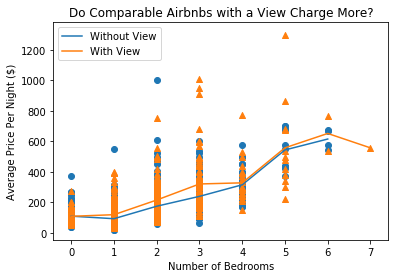

In [6]:
WithView = joined.query("View == True")
NoView = joined.query("View == False")

# Plot the observations without a view with a blue circle.
plt.scatter(NoView["bedrooms"], NoView["price"], marker = "o");
# Plot the observations with a view with an orange triangle.
plt.scatter(WithView["bedrooms"], WithView["price"], marker = "^");
# Add in lines showing the average nightly price according to the number of bedrooms and whether the AirBnB has the word 'View' listed in the description.
plt.plot(MeanPricesNoView.index.get_level_values('bedrooms').values, MeanPricesNoView["price"])
plt.plot(MeanPricesView.index.get_level_values('bedrooms').values, MeanPricesView["price"])

#Add in additional characteristics of the graph, such as the legend and title.
plt.legend(["Without View", "With View"])
plt.ylabel('Average Price Per Night ($)');
plt.xlabel('Number of Bedrooms');
plt.title("Do Comparable Airbnbs with a View Charge More?");